In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 


In [3]:
df1 = pd.read_csv("aps_failure_test_set.csv")
df1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [4]:
df2 = pd.read_csv("aps_failure_training_set.csv")
df2.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [5]:
df = df1.append(df2,sort=False)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8228\1927024559.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2,sort=False)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


In [6]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [7]:
df['class'].replace({'neg':0,'pos':1},inplace=True)

In [9]:
cat_feat = [cat for cat in df.columns if df[cat].dtypes == 'O']
print('We have {} categorical features are {}'.format(len(cat_feat),cat_feat))

We have 169 categorical features are ['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_

In [10]:
list1 = ['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 
'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 
'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 
'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 
'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 
'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000']

In [11]:
list2 = ['bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 
'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 
'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 
'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 
'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 
'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 
'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 
'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000']

In [12]:
for i in cat_feat:
    df[i].replace({'na':0},inplace=True)

In [13]:
for i in list1:
    df[i] = df[i].apply(np.int64)

In [14]:
for i in list2:
    df[i] = df[i].apply(np.float64)

In [15]:
num_feat = [num for num in df.columns if df[num].dtypes !='O']
print('We have {} numerical features are {}'.format(len(num_feat),num_feat))

We have 171 numerical features are ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,76000.0,1.809211e-02,1.332855e-01,0.0,0.0,0.0,0.0,1.000000e+00
aa_000,76000.0,6.115976e+04,2.647366e+05,0.0,860.0,30813.0,48840.0,4.294967e+07
ab_000,76000.0,1.652368e-01,1.609493e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,76000.0,3.364557e+08,7.769769e+08,0.0,8.0,120.0,848.0,2.130707e+09
ad_000,76000.0,1.132856e+05,3.113852e+07,0.0,0.0,42.0,292.0,8.584298e+09
...,...,...,...,...,...,...,...,...
ee_007,76000.0,3.436145e+05,1.698269e+06,0.0,90.0,38854.0,166632.0,1.195801e+08
ee_008,76000.0,1.383082e+05,4.667963e+05,0.0,0.0,3294.0,136421.5,1.926740e+07
ee_009,76000.0,8.329316e+03,4.848501e+04,0.0,0.0,0.0,1908.0,4.570398e+06
ef_000,76000.0,8.128947e-02,4.082657e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [17]:
X = df.drop("class",axis=1)
y = df['class']

In [18]:
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,0,20,12,0,0,0,0,0,2682,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,0,68,40,0,0,0,0,0,0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2,212,112,0,0,0,0,0,199486,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,0,1010,936,0,0,0,0,0,0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,0,156,140,0,0,0,0,0,0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,153002,0,664,186,0,0,0,0,0,2564,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,2286,0,2130706538,224,0,0,0,0,0,0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,112,0,2130706432,18,0,0,0,0,0,0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,80292,0,2130706432,494,0,0,0,0,0,0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 76000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train = scaler.transform(X_train)
X_train

array([[-0.13903424, -0.09969502, -0.43164025, ..., -0.11843116,
        -0.01893781, -0.01948239],
       [ 0.26438814, -0.09969502, -0.43163754, ...,  0.79799334,
        -0.01893781, -0.01948239],
       [-0.08599069, -0.09969502, -0.43164089, ..., -0.04510576,
        -0.01893781, -0.01948239],
       ...,
       [-0.2500101 , -0.09969502, -0.4316412 , ..., -0.17088231,
        -0.01893781, -0.01948239],
       [ 0.31684538, -0.09969502, -0.43164075, ..., -0.17088231,
        -0.01893781, -0.01948239],
       [-0.26150344, -0.09969502, -0.4316412 , ..., -0.17088231,
        -0.01893781, -0.01948239]])

In [25]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.73755366, -0.09969502, -0.43163823, ..., -0.17088231,
        -0.01893781, -0.01948239],
       [-0.09053457, -0.09969502, -0.4316412 , ...,  0.97291221,
        -0.01893781, -0.01948239],
       [-0.14291421, -0.09969502, -0.4316412 , ..., -0.16622543,
        -0.01893781, -0.01948239],
       ...,
       [-0.08136059, -0.09969502, -0.4316412 , ..., -0.17088231,
        -0.01893781, -0.01948239],
       [ 1.54275313, -0.09969502,  2.31674172, ..., 14.91033436,
        -0.01893781, -0.01948239],
       [-0.26080504, -0.09969502,  2.31674172, ..., -0.17088231,
        -0.01893781, -0.01948239]])

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train,y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
ytest_pred = model.predict(X_test)

In [31]:
accuracy_score(y_test,ytest_pred)

0.9903157894736843

## Confusion Matrix

In [32]:

conf_mat = confusion_matrix(y_test,ytest_pred)
conf_mat

array([[18582,    50],
       [  134,   234]], dtype=int64)

In [33]:
true_positive = conf_mat[0][0]
true_positive

18582

In [34]:
false_positive = conf_mat[0][1]
false_positive

50

In [35]:
false_negative = conf_mat[1][0]
false_negative

134

In [36]:
true_negative = conf_mat[1][1]
true_negative

234

In [37]:

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9903157894736843

In [38]:

Precision = true_positive/(true_positive+false_positive)
Precision

0.9973164448261056

In [39]:

Recall = true_positive/(true_positive+false_negative)
Recall

0.9928403505022441

In [40]:

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9950733640355575

In [41]:
print(classification_report(ytest_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18716
           1       0.64      0.82      0.72       284

    accuracy                           0.99     19000
   macro avg       0.82      0.91      0.86     19000
weighted avg       0.99      0.99      0.99     19000



In [42]:
# Area Under Curve
auc = roc_auc_score(y_test, ytest_pred)
auc

0.8165930050217485

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_pred)

In [44]:
import numpy as np 
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(ytest_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,thresholds,accuracy
2,0,0.990316
0,2,0.980632
1,1,0.980632


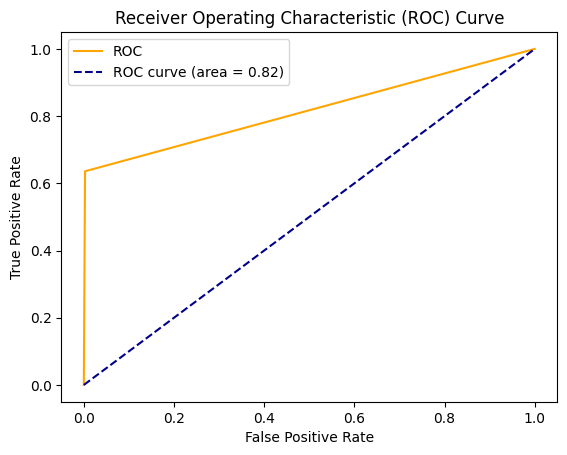

In [45]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## SVM

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
ytest_pred = classifier.predict(X_test)
accuracy_score(y_test, ytest_pred)

0.9910526315789474

In [84]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
ytest_pred = classifier.predict(X_test)
accuracy_score(y_test, ytest_pred)

0.9875263157894737

In [85]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
ytest_pred = classifier.predict(X_test)
accuracy_score(y_test, ytest_pred)

0.9690526315789474

## Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()

In [87]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
model1.score(X_train,y_train)

1.0

[Text(0.7373685580108211, 0.9861111111111112, 'X[70] <= 1.749\ngini = 0.035\nsamples = 57000\nvalue = [55993, 1007]'),
 Text(0.5545949895407297, 0.9583333333333334, 'X[8] <= 0.817\ngini = 0.011\nsamples = 55399\nvalue = [55101, 298]'),
 Text(0.5062939720608363, 0.9305555555555556, 'X[84] <= 3.902\ngini = 0.007\nsamples = 55222\nvalue = [55020, 202]'),
 Text(0.4772654342489213, 0.9027777777777778, 'X[41] <= 3.227\ngini = 0.005\nsamples = 55088\nvalue = [54944, 144]'),
 Text(0.45431147402658334, 0.875, 'X[8] <= 0.33\ngini = 0.005\nsamples = 55073\nvalue = [54938, 135]'),
 Text(0.4189344882023549, 0.8472222222222222, 'X[32] <= 3.343\ngini = 0.004\nsamples = 54950\nvalue = [54838, 112]'),
 Text(0.37626300887509156, 0.8194444444444444, 'X[88] <= 1.025\ngini = 0.004\nsamples = 54934\nvalue = [54829, 105]'),
 Text(0.31040159366067016, 0.7916666666666666, 'X[94] <= 5.243\ngini = 0.002\nsamples = 53906\nvalue = [53854, 52]'),
 Text(0.30311999293783876, 0.7638888888888888, 'X[28] <= 22.514\ngini

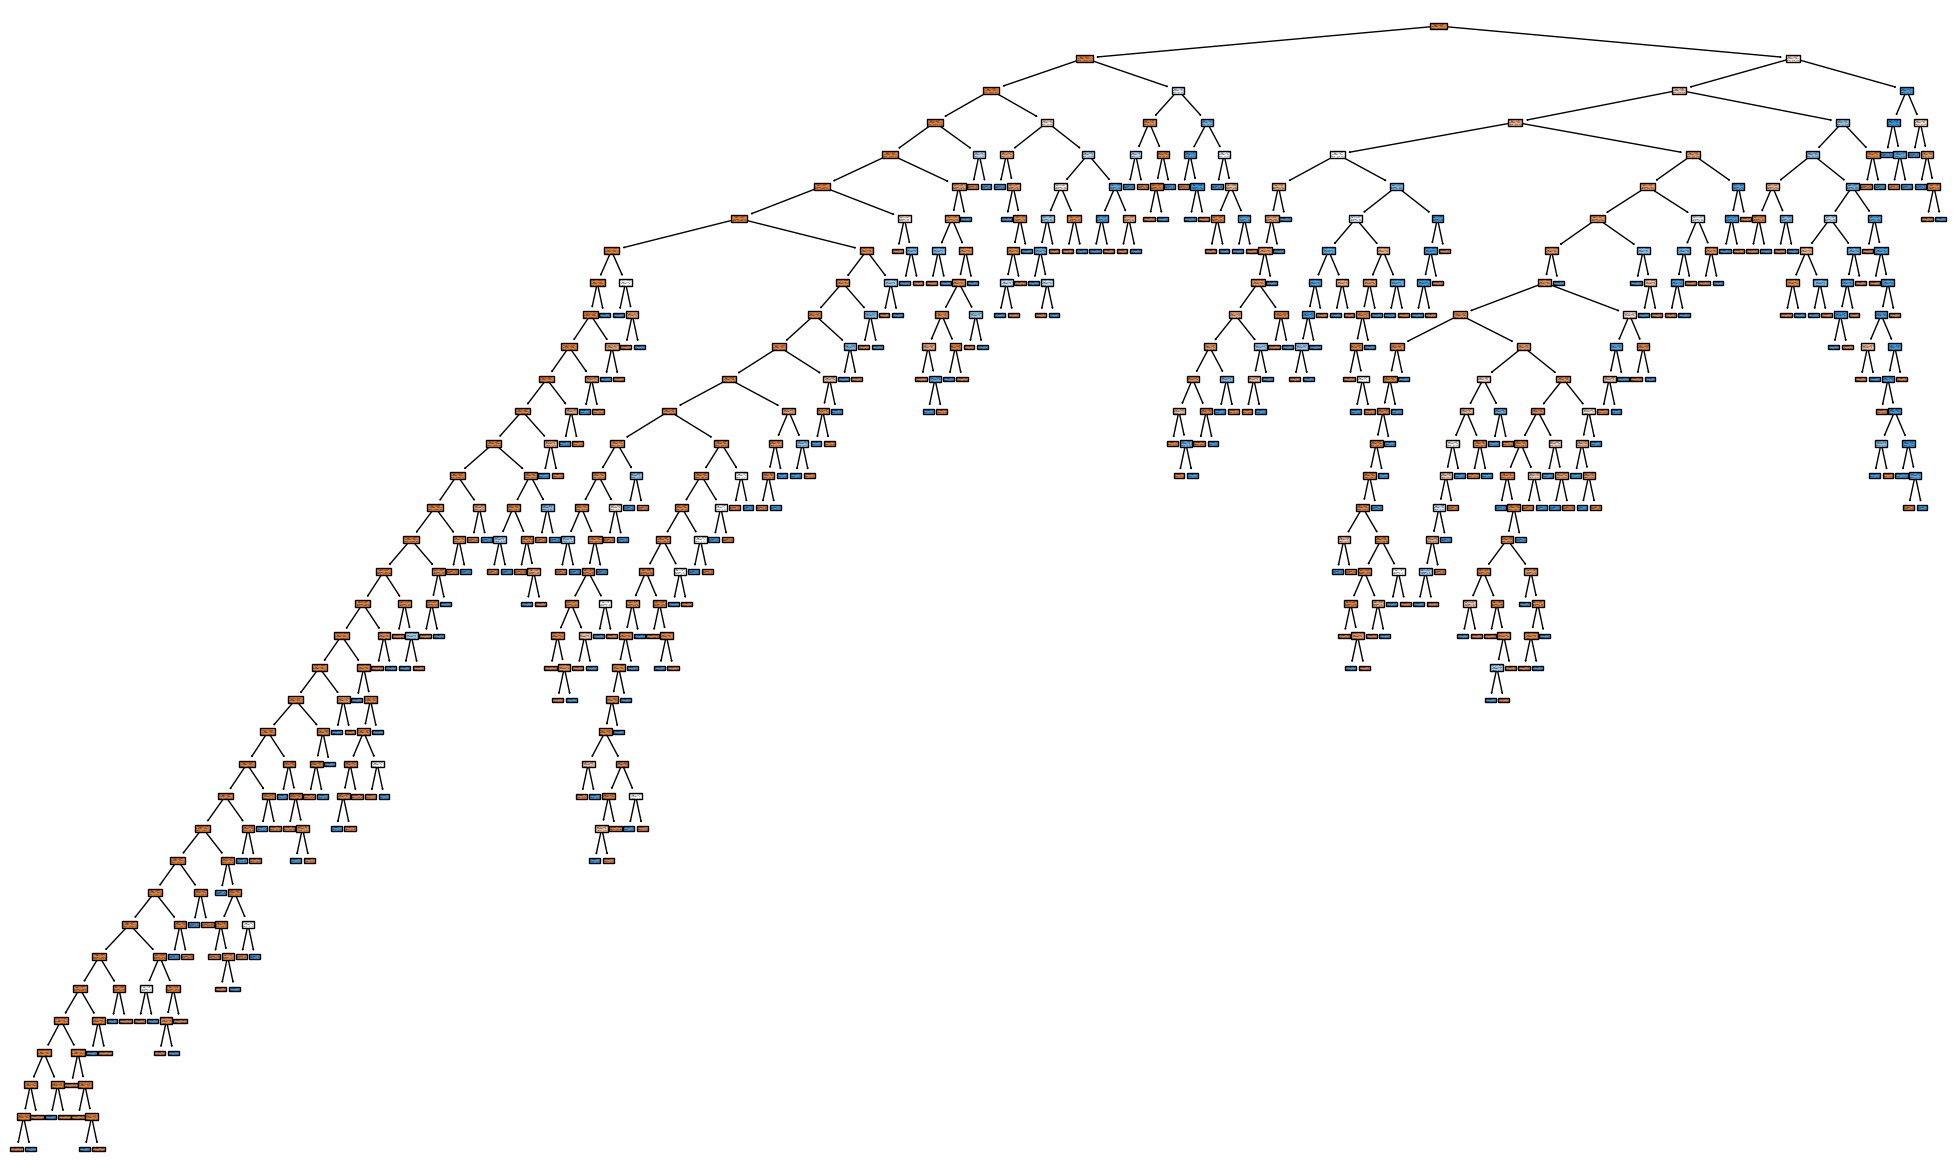

In [89]:
from sklearn import tree
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model1,filled=True)

In [90]:
fig.savefig("decistion_tree_classifier_aps.png")

In [91]:
y_predict=model1.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_predict)

0.989

In [94]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 6,min_samples_leaf= 4,min_samples_split= 6,splitter='random')

In [95]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       splitter='random')

[Text(0.5245253164556962, 0.9285714285714286, 'X[25] <= 1.705\ngini = 0.035\nsamples = 57000\nvalue = [55993, 1007]'),
 Text(0.3037974683544304, 0.7857142857142857, 'X[9] <= 5.619\ngini = 0.01\nsamples = 55196\nvalue = [54921, 275]'),
 Text(0.20253164556962025, 0.6428571428571429, 'X[8] <= 0.653\ngini = 0.008\nsamples = 55152\nvalue = [54917, 235]'),
 Text(0.10126582278481013, 0.5, 'X[88] <= 2.883\ngini = 0.006\nsamples = 54974\nvalue = [54816, 158]'),
 Text(0.05063291139240506, 0.35714285714285715, 'X[41] <= 2.991\ngini = 0.004\nsamples = 54809\nvalue = [54692, 117]'),
 Text(0.02531645569620253, 0.21428571428571427, 'X[142] <= 0.764\ngini = 0.004\nsamples = 54796\nvalue = [54687, 109]'),
 Text(0.012658227848101266, 0.07142857142857142, 'gini = 0.002\nsamples = 53742\nvalue = [53678, 64]'),
 Text(0.0379746835443038, 0.07142857142857142, 'gini = 0.082\nsamples = 1054\nvalue = [1009, 45]'),
 Text(0.0759493670886076, 0.21428571428571427, 'X[164] <= -0.197\ngini = 0.473\nsamples = 13\nvalu

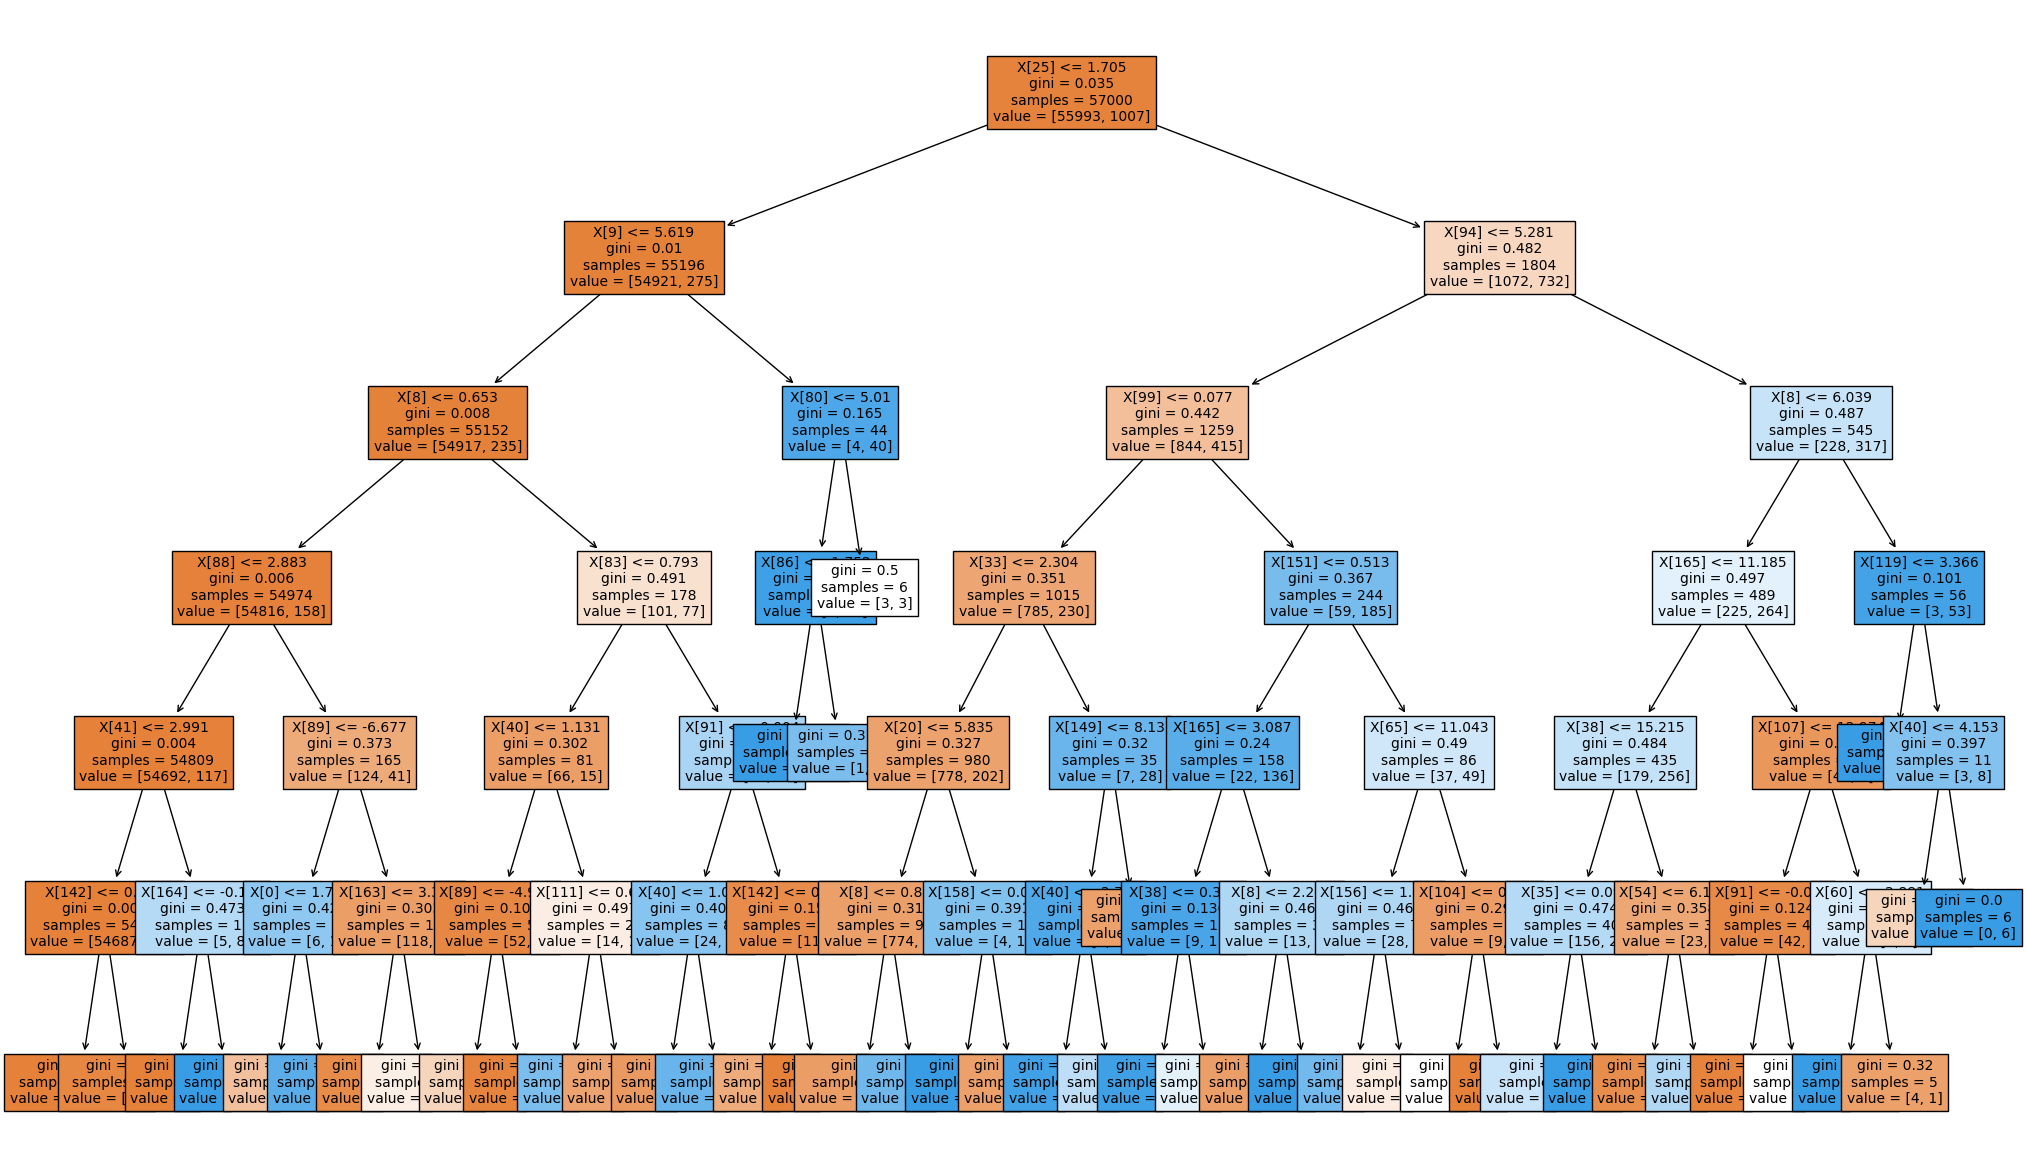

In [96]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [97]:
y_prediction2=model_with_best_params.predict(X_test)

In [98]:
accuracy_score(y_test,y_prediction2)

0.9873157894736843

## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [100]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
y_pred_rf=Rf_model.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred_rf)

0.9928947368421053

In [103]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [104]:
Rf_model_with_best_params.fit(X_train,y_train)

RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=115)

In [105]:
y_predict_rf_bp=Rf_model_with_best_params.predict(X_test)

In [106]:
accuracy_score(y_test,y_predict_rf_bp)

0.9918947368421053

## Adaboost

In [118]:
from sklearn.ensemble import AdaBoostClassifier
model_adb = AdaBoostClassifier()

In [119]:
model_adb.fit(X_train,y_train)

AdaBoostClassifier()

In [120]:
y_pred_adb =model_adb.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred_adb)

0.9899473684210527

## GradientBoost

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm=GradientBoostingClassifier()

In [110]:
model_gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [111]:
y_pred_gbm=model_gbm.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred_gbm)

0.9906842105263158

## XGBoost

In [113]:
import xgboost

In [114]:
model_xgb=xgboost.XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)

In [115]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [116]:
y_pred_xgb=model_xgb.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred_xgb)

0.9936315789473684